In [1]:
import webMining as wm
from IPython.core.display import display, HTML
from tabulate import tabulate
from matplotlib import pyplot as plt
from matplotlib import patches
import requests
import numpy as np
import subprocess
#import mpld3
#mpld3.enable_notebook()

Start Web Driver

In [2]:
web_driver_process = subprocess.Popen('../WebDriver/geckodriver')

Retrieve HTML Document

In [3]:
url = 'https://www.kabum.com.br/cgi-local/site/listagem/listagem.cgi?string=rtx&btnG='
try:
    wd = wm.FireFoxWebDriver()
    wd.newSession()
    wd.go(url)
    pageSource = wd.getPageSource()
    wd.deleteSession()
    f = open('doc.html', 'w')
    f.write(pageSource)
    f.close()
finally:
    web_driver_process.terminate()


Instantiate DOM tree and extractor

In [4]:
doc = wm.DOM(url, pageSource)
#doc = wm.DOM('doc.html')
dsre = wm.DSRE()
#dsre.setMinPSD(5)
#dsre.setMinCV(0.5)

Extract

In [5]:
#%%timeit
dsre.setUseFourier(True) # False = Lazy FFT (faster), True = Full FFT
dsre.extract(doc)

<ipython-input-5-b77a20a4ebb2>:3: DeprecationWarning: an integer is required (got type numpy.float64).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  dsre.extract(doc)


Iterate over the extracted regions:
    - content: True/False;
    - sequence: region's subsequence;
    - transform: region's Fourier Transform;
    - table: extracted records (rows x cols);
    - rows: number of records.

In [6]:
regions = []
for reg in range(0, dsre.regionCount()):
    region = dict()
    dr = dsre.getDataRegion(reg)
    region['content'] = dr.isContent()
    region['sequence'] = dr.getSequence()
    region['transform'] = dr.getTransform()
    region['table'] = dr.getTable()
    region['rows'] = len(region['table'])
    region['start'] = dr.getStartPos()
    region['end'] = dr.getEndPos()
    regions.append(region)

Displays a table with the results of each region

In [7]:
content_string = ['noise', 'content']
for i, region in enumerate(regions):
    display('Region #' + str(i) + ' - ' + content_string[region['content']] + ', ' + str(region['rows']) + ' records')
    display(tabulate(region['table'], tablefmt='html'))

'Region #0 - content, 30 records'

<img class=sc-fzoyTs NYYNQ src=https://images7.kabum.com.br/produtos/fotos/103547/memoria-hyperx-fury-8gb-2666mhz-ddr4-cl16-preto-hx426c16fb3-8_memoria-hyperx-fury-8gb-2666mhz-ddr4-cl16-preto-hx426c16fb3-8_1566487475_m.jpg />,"Memória HyperX Fury, 8GB, 2666MHz, DDR4, CL16, Preto - HX426C16FB3/8",..,<img alt=Hyperx class=sc-fznyAO brXUpP src=https://images7.kabum.com.br/produtos/fabricantes/logo-hyperx.jpg />,<img alt=tag de disponibilidade do produto class=sc-fznZeY hHaoVN src=https://static.kabum.com.br/conteudo/temas/001/imagens/listagem/icone_disponivel.gif />,(799 avaliações),"R$ 417,53",Em até 12X sem juros,"R$ 354,90",no boleto,<img alt=botao comprar src=https://static.kabum.com.br/conteudo/temas/001/imagens/icones/comprar.png />,<img alt=detalhes do produto src=https://static.kabum.com.br/conteudo/temas/001/imagens/icones/detalhes-listagem.png />,"De R$ 458,71 por",
<img class=sc-fzoyTs NYYNQ src=https://images2.kabum.com.br/produtos/fotos/103282/fonte-xpg-core-reactor-850w-80-plus-gold-modular_fonte-xpg-core-reactor-850w-80-plus-gold-modular_1571154124_m.jpg />,"Fonte XPG Core Reactor, 850W, 80 Plus Gold Modular",..,<img alt=XPG class=sc-fznyAO brXUpP src=https://images2.kabum.com.br/produtos/fabricantes/logo-xpg.jpg />,<img alt=tag de disponibilidade do produto class=sc-fznZeY hHaoVN src=https://static.kabum.com.br/conteudo/temas/001/imagens/listagem/icone_disponivel.gif />,(139 avaliações),"R$ 1.046,94",Em até 12X sem juros,"R$ 889,90",no boleto,<img alt=botao comprar src=https://static.kabum.com.br/conteudo/temas/001/imagens/icones/comprar.png />,<img alt=detalhes do produto src=https://static.kabum.com.br/conteudo/temas/001/imagens/icones/detalhes-listagem.png />,"De R$ 1.176,35 por",
<img class=sc-fzoyTs NYYNQ src=https://images1.kabum.com.br/produtos/fotos/84471/84471_index_m.jpg />,"Memória Corsair Vengeance LPX, 8GB, 2400MHz, DDR4, CL16, Preto - CMK8GX4M1A2400C16",..,<img alt=Corsair class=sc-fznyAO brXUpP src=https://images1.kabum.com.br/produtos/fabricantes/logo-corsair.jpg />,<img alt=tag de disponibilidade do produto class=sc-fznZeY hHaoVN src=https://static.kabum.com.br/conteudo/temas/001/imagens/listagem/icone_disponivel.gif />,(699 avaliações),"R$ 372,82",Em até 12X sem juros,"R$ 316,90",no boleto,<img alt=botao comprar src=https://static.kabum.com.br/conteudo/temas/001/imagens/icones/comprar.png />,<img alt=detalhes do produto src=https://static.kabum.com.br/conteudo/temas/001/imagens/icones/detalhes-listagem.png />,"De R$ 458,71 por",
<img class=sc-fzoyTs NYYNQ src=https://images9.kabum.com.br/produtos/fotos/130209/placa-de-video-gigabyte-nvidia-geforce-rtx-3070-gaming-oc-8g-8gb-gddr6-gv-n3070gaming-oc-8gd_1603479512_m.jpg />,"Placa de Vídeo Gigabyte NVIDIA GeForce RTX 3070 Gaming OC 8G, 8gb, GDDR6 - GV-N3070GAMING OC-8GD",..,<img alt=Gigabyte class=sc-fznyAO brXUpP src=https://images9.kabum.com.br/produtos/fabricantes/logo-gigabyte.jpg />,<img alt=tag de disponibilidade do produto class=sc-fznZeY hHaoVN src=https://static.kabum.com.br/conteudo/temas/001/imagens/listagem/icone_disponivel.gif />,(21 avaliações),"R$ 10.588,12",Em até 12X sem juros,"R$ 8.999,90",no boleto,<img alt=botao comprar src=https://static.kabum.com.br/conteudo/temas/001/imagens/icones/comprar.png />,<img alt=detalhes do produto src=https://static.kabum.com.br/conteudo/temas/001/imagens/icones/detalhes-listagem.png />,,
<img class=sc-fzoyTs NYYNQ src=https://images9.kabum.com.br/produtos/fotos/95459/95459_1520954069_index_m.jpg />,"Placa de Vídeo Asus NVIDIA GeForce GTX 1050 Ti OC Cerberus 4GB, GDDR5 - CERBERUS-GTX1050TI-O4G",..,<img alt=Asus class=sc-fznyAO brXUpP src=https://images9.kabum.com.br/produtos/fabricantes/logo-asus.jpg />,<img alt=tag de disponibilidade do produto class=sc-fznZeY hHaoVN src=https://static.kabum.com.br/conteudo/temas/001/imagens/listagem/icone_disponivel.gif />,(148 avaliações),"R$ 1.764,59",Em até 12X sem juros,"R$ 1.499,90",no boleto,<img alt=botao comprar src=https://static.kabum.com.br/conteudo/tema

Plot the sequence of the document and the subsequence+transform of each region

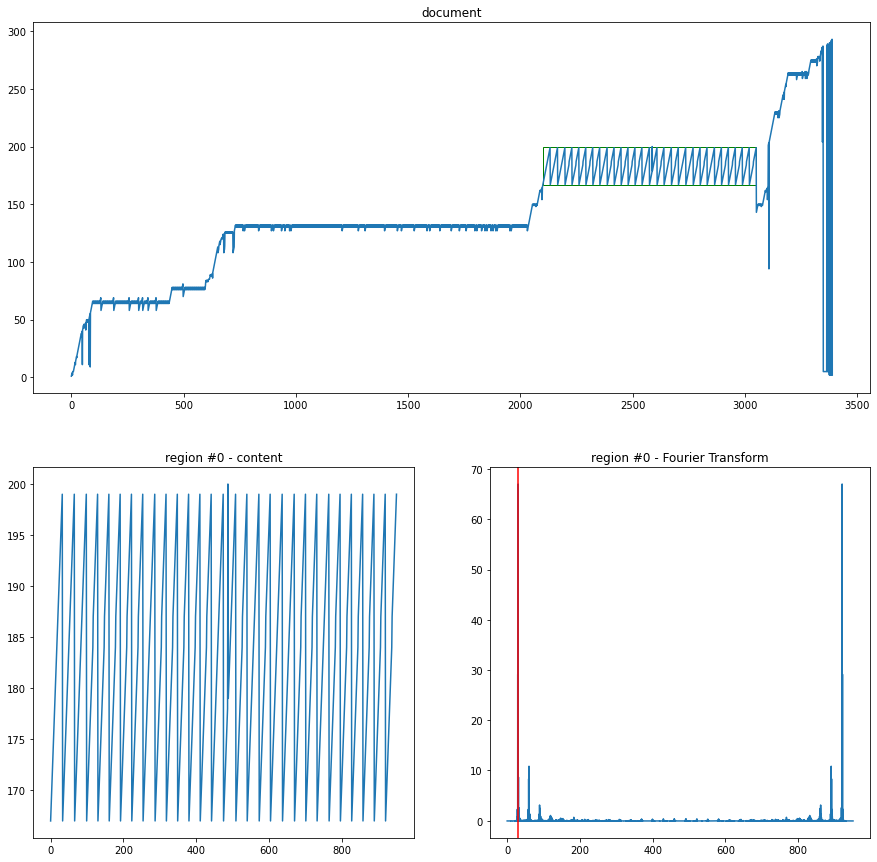

In [8]:
#%matplotlib notebook
rows = len(regions) + 1
plt.figure(figsize=(15,15))
ax = plt.subplot(rows, 1, 1)
plt.title('document')
plt.plot(dsre.getSequence())
for i, region in enumerate(regions):
    
    xy = (region['start'], min(region['sequence']))
    width = region['end'] - region['start']
    height = max(region['sequence']) - min(region['sequence'])
    color = "green" if region['content'] else "red"
    ax.add_patch(patches.Rectangle(xy, width, height, color=color, fill=False))
    
    plt.subplot(rows, 2, (i+1)*2 + 1)
    plt.title('region #' + str(i) + ' - ' + content_string[region['content']])
    plt.plot(region['sequence'])
    plt.subplot(rows, 2, (i+1)*2 + 2)
    plt.title('region #' + str(i) + ' - Fourier Transform')
    sequence_len = len(region['sequence'])
    transform_len = len(region['transform'])
    plt.plot(
        np.linspace(0, sequence_len, transform_len), 
        region['transform'][0:transform_len])
    plt.axvline(region['rows'], min(region['transform']), max(region['transform']), c='r')
    plt.plot()